Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import plotly_express as px

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')


# Section 1: Data Loading
Load the crime data and filter it for the years 2008 to 2012.

In [2]:

# Load the crime data
crime_data_path = 'chicago_crime.csv'  # Placeholder path
crime_df = pd.read_csv(crime_data_path)

# Filter the crime data for the years 2008 to 2012
crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df = crime_df[crime_df['Date'].dt.year.isin(range(2008, 2013))]

# Display the first few rows of the crime data
crime_df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
9,11645833,JC213044,2012-05-05 12:25:00,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,29.0,25.0,11,NaN,NaN,2012,04/06/2019 04:04:43 PM,NaN,NaN,NaN
24,11646447,JC213946,2008-10-24 14:30:00,036XX N NARRAGANSETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,36.0,17.0,11,NaN,NaN,2008,04/07/2019 04:05:59 PM,NaN,NaN,NaN
33,11031104,JA362043,2008-07-24 00:01:00,031XX W FILLMORE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,True,...,24.0,29.0,17,NaN,NaN,2008,07/26/2017 03:56:50 PM,NaN,NaN,NaN
50,11648237,JC216157,2012-01-01 12:00:00,115XX S CAMPBELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,19.0,75.0,11,NaN,NaN,2012,04/09/2019 04:24:58 PM,NaN,NaN,NaN
53,11648822,JC216887,2011-12-13 00:00:00,115XX S MARSHFIELD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,ATHLETIC CLUB,False,False,...,34.0,75.0,11,NaN,NaN,2011,04/09/2019 04:24:58 PM,NaN,NaN,NaN


In [4]:
# Load the census data
census_data_path = 'chicago_census.csv'  # Placeholder path
census_df = pd.read_csv(census_data_path)

# Filter the crime data for the years 2008 to 2012
census_df_df['Date'] = pd.to_datetime(census_df['Date'])
census_df = census_df[census_df['Date'].dt.year.isin(range(2008, 2013))]

# Display the first few rows of the crime data
census_df.head()


KeyError: 'Date'

#section 1: alternative 2 for better memory handling of the huge crime file.
Here I use data chunks, dtypes, parse_dates and usecols. 
Data chunks makes it more manageable for the system.
Knowing dtypes of data, I specify it to the columns while loading the data to optimize memory usage. 
parse_dates parameter is used to parse the date column while loading the data, and usecols to load only the necessary columns. This will reduce memory usage.

In [ ]:
'''import pandas as pd

# Define the file path
crime_data_path = 'chicago_crime.csv'

# Define the columns needed
useful_columns = ['Date', 'Primary Type', 'Description', ...]  # and others if we need it can be added here

# Create an empty DataFrame to hold filtered data
filtered_crime_df = pd.DataFrame()

# Read the file in chunks
chunk_size = 100000  # chunks can be adjusted if we have more ram
for chunk in pd.read_csv(crime_data_path, chunksize=chunk_size, usecols=useful_columns, parse_dates=['Date']):
    filtered_chunk = chunk[chunk['Date'].dt.year.isin(range(2008, 2013))]
    filtered_crime_df = pd.concat([filtered_crime_df, filtered_chunk])

# Display the first few rows of the filtered data
filtered_crime_df.head()'''


# Section 2: Basic Data Exploration

Explore the types of crimes and their frequencies in the crime data, and explore the socioeconomic indicators in the census data.

In [3]:

# Basic exploration of the datasets

# Crime Data: Exploring the types of crimes and their frequencies
crime_types = crime_df['Primary Type'].value_counts()

# Census Data: Exploring socioeconomic indicators
census_summary = census_df.describe()


NameError: name 'census_df' is not defined

# Section 3: Advanced Data Analysis

Perform time series analysis of crime trends and correlate crime with socioeconomic indicators.

In [5]:

# Advanced analysis of crime trends and socioeconomic factors

# Time Series Analysis: Crime trends over the years 2008-2012
crime_trends = crime_df.groupby(crime_df['Date'].dt.year).size()

# Socioeconomic Analysis: Correlating crime with socioeconomic indicators
# Merging crime and census data on community area
merged_df = pd.merge(crime_df, census_df, left_on='Community Area', right_on='Community Area Number', how='left')

# Analysis of crime types with respect to socioeconomic factors like poverty and unemployment
crime_socioeconomic_analysis = merged_df.groupby('Primary Type')['PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED'].mean()


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

# Section 4: Data Visualization

Visualize crime trends and the relationship between crime types and poverty level.

NameError: name 'crime_socioeconomic_analysis' is not defined

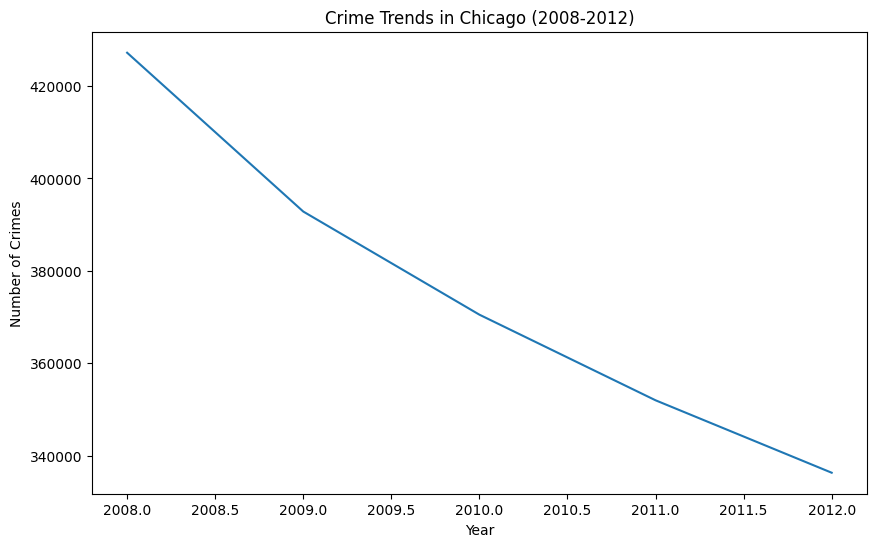

In [6]:

# Data Visualization

# Visualizing crime trends
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(crime_trends)
plt.title('Crime Trends in Chicago (2008-2012)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Visualizing the relationship between crime types and poverty
import seaborn as sns
sns.barplot(x=crime_socioeconomic_analysis['PERCENT HOUSEHOLDS BELOW POVERTY'], y=crime_socioeconomic_analysis.index)
plt.title('Crime Types vs. Poverty Level')


# Section 5: Reflection and Further Analysis

Reflection on the analysis, further questions, and potential improvements.

In [ ]:

# Reflection and further analysis based on the findings

# Reflection on the reliability of the conclusions drawn from the analysis
# Further questions that can be explored based on the analysis
# Potential improvements in methodology or data handling
